## 6-3. Emphasizing continuity with line plots

Scatter plots are highly effective, but there is no universally optimal type of visualization. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understnad chages in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the 'lineplot()' function, either directly or with 'relplot()' by setting <kind='line'>:

In [2]:
import seaborn as sns

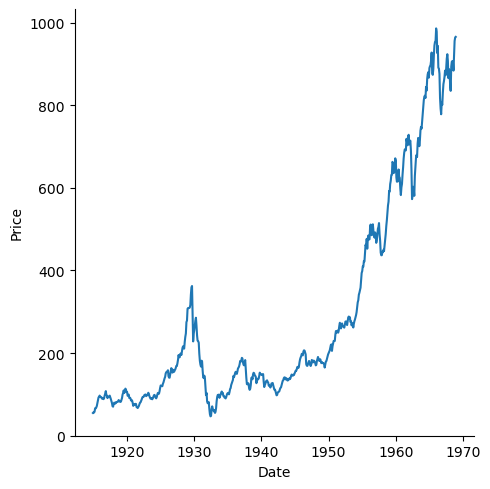

In [3]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the 'x' variable. The default behavior in seaborn is to aggregate the multiple measurements at each 'x' value by plotting the mean and the 95% confidence interval around the mean:

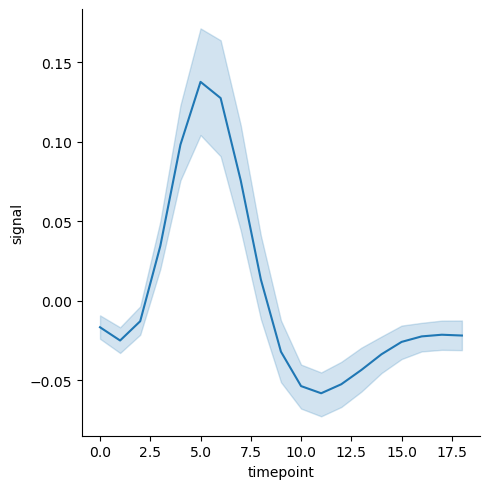

In [11]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

신뢰구간은 bootstrapping에 의해 계산되며, 데이터가 클수록 시간이 오래 걸린다. 이를 제거하기 위해서 'errorbar=None'을 사용한다.

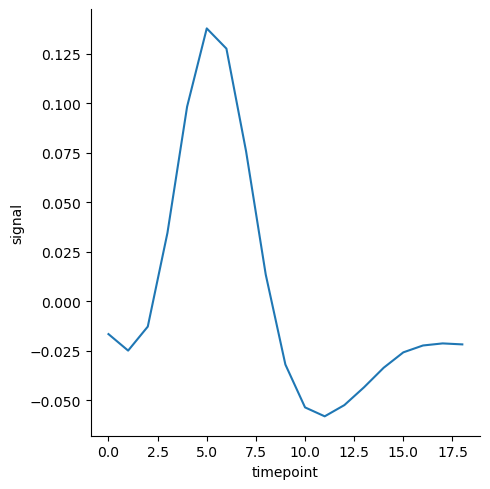

In [5]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

주로 대용량의 데이터에서, timepoint에서의 분포를 나타내는 방법도 있다. 이는 신뢰구간 대신 standard deviation을 이용하는 것이다.

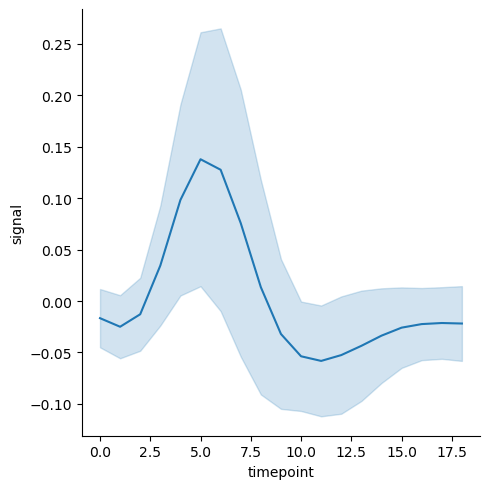

In [8]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

모든 aggregation을 생략하기 위해서는 <estimator='None'> 을 해주면 된다.

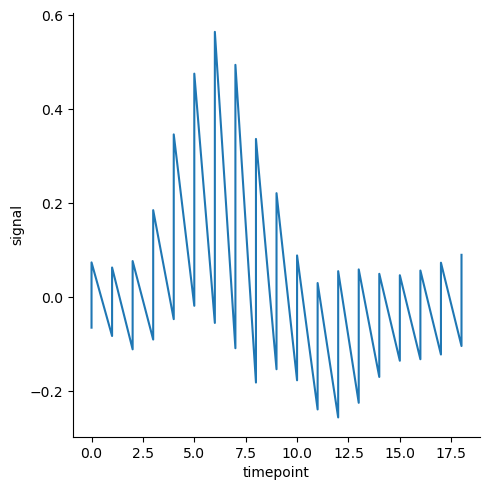

In [9]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
)

### Plotting subsets of data with demantic mappings

The 'lineplot()' function has the same flexibility as 'scattorplot():

It can show up to three addition variables by modifying the hue, size and style of the plot element. 

Using semaantics in 'lineplot()' will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

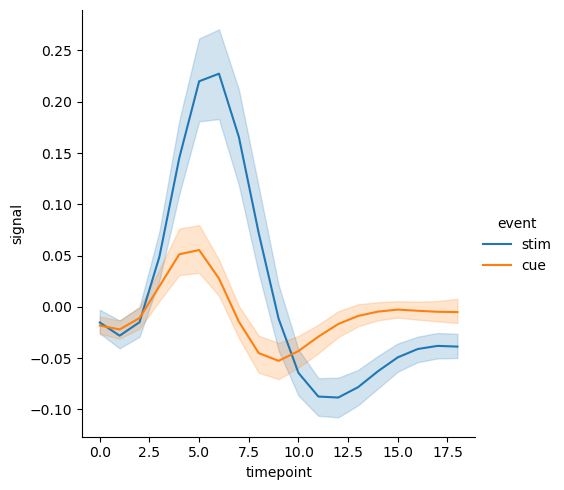

In [10]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default

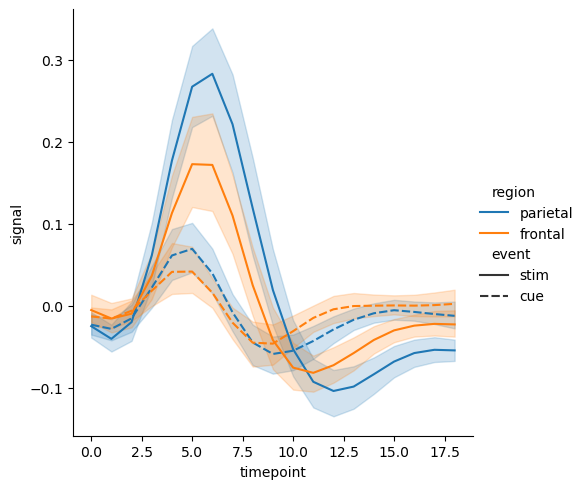

In [11]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

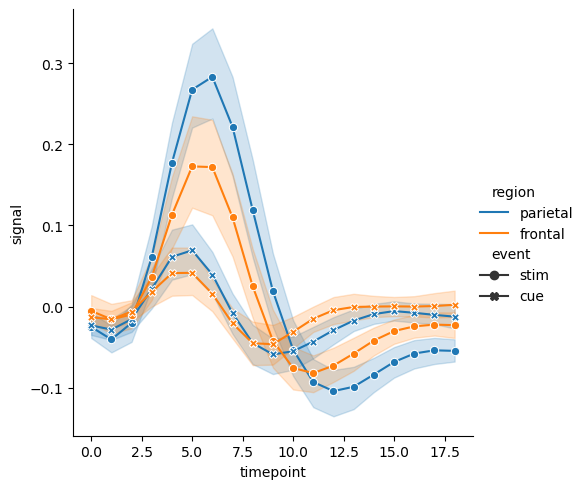

In [12]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

As with scatter plots, be cautious about making line plots using multiple semantics. While sometimes informative, they can also be difficult to parse and interpret. 

But even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness.

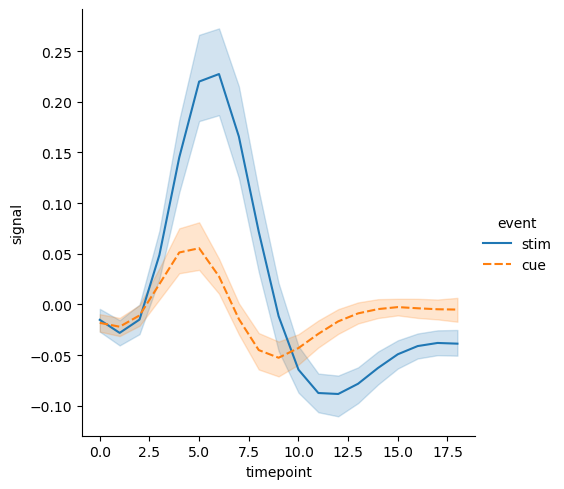

In [13]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",
)

When you are working with repeated measures data, you can also plot each sampling unit separately without distinguishing them through semantics. This avoids clottering the legend:

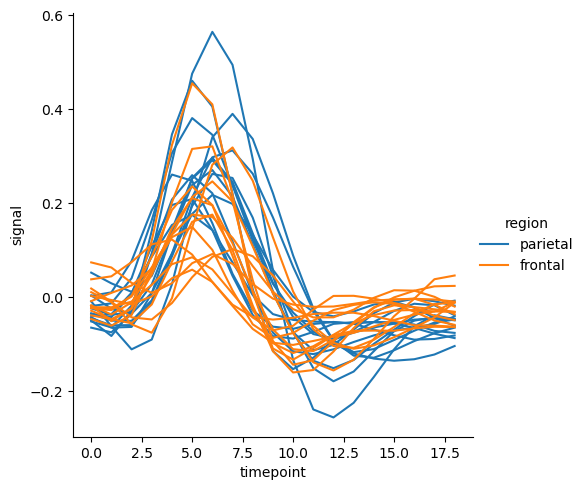

In [16]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

The default colormap and handling of the legend in 'lineplot()' also depends on whether the hue semantic is categorical or numeric: 

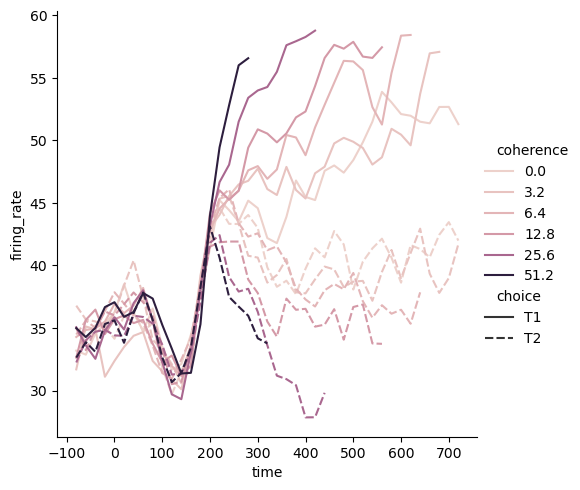

In [3]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

'hue' 변수가 수치형이어도, 선형 color scale로 표현이 가능하다. hue 변수의 levels이 logarithmically scaled 되어 있을때가 그러한 경우이다. 

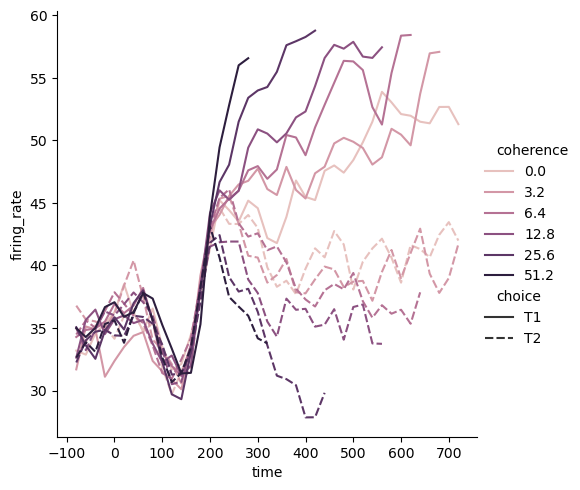

In [4]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

colormap이 정규화된 방식을 바꿀 수도 있다.

In [ ]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

세 번째 파라미터인 size는 선의 두께를 결정한다. 

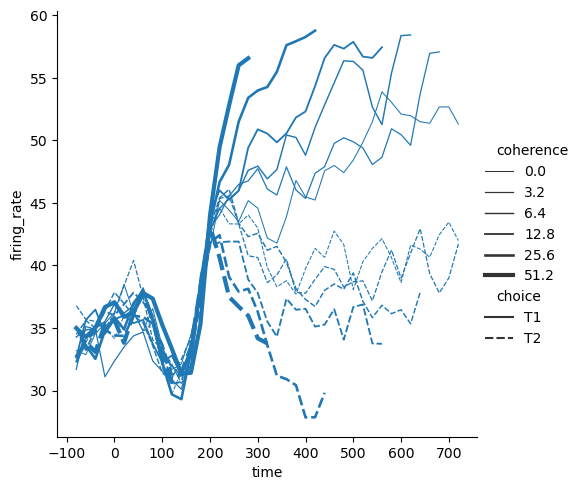

In [6]:

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
)

size 변수가 일반적으로 수치형인데 반해, 범주형 변수에도 적용이 될 수 있다. 하지만 이때는 두께로 구별이 어려우므로 주의해야한다.

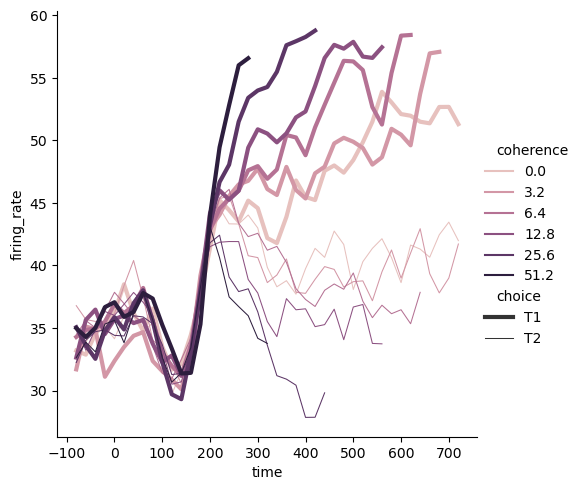

In [7]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

### Controlling sorting and orientation

Lineplot()은 x에 대한 함수인 y를 그린다고 가정하기 때문에 default behavior가 to sort the data by the x values before plotting. However, this can be disabled

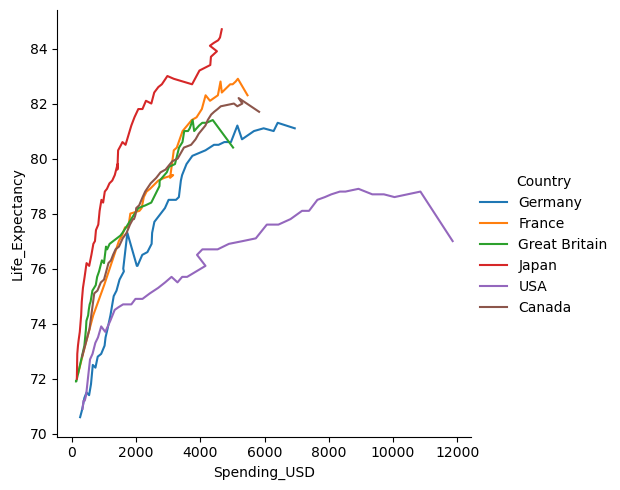

In [8]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
)

y축에 대해 sort하는 것도 가능하다.

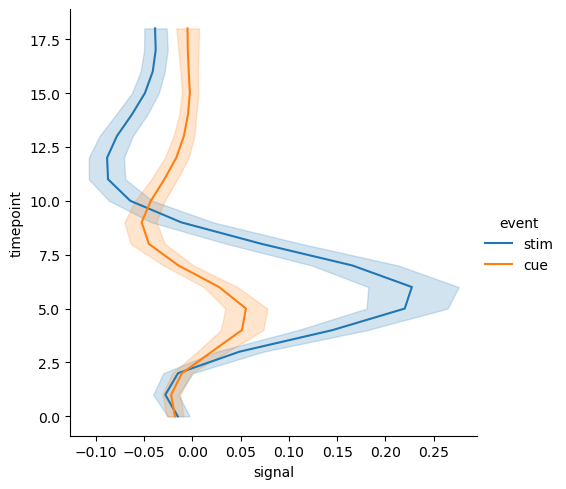

In [12]:
sns.relplot(
    data=fmri, kind="line",
     x="signal", y="timepoint", hue="event",
    orient="y",
)